In [1]:
import Agents
import Markets

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

def add_price_data(df, t):
    
    pA_buy, pA_sell, pB_buy, pB_sell = df

    pA_buy[t] = agent_list[0].p_buy
    pA_sell[t] = agent_list[0].p_sell

    pB_buy[t] = agent_list[1].p_buy
    pB_sell[t] = agent_list[1].p_sell



In [2]:
def add_quant_data(df, t):

    QA_df, QB_df = df

    QA_df[t] = agent_list[0].Q
    QB_df[t] = agent_list[1].Q
    
    #print(agent_list[0].Q)
    
def add_deficit_data(df, t):

    DA_df, DB_df = df

    DA_df[t] = agent_list[0].D
    DB_df[t] = agent_list[1].D
    
def add_money_data(M_df, t):
    
    M_df[t,0] = agent_list[0].M
    M_df[t,1] = agent_list[1].M
    
def reset():
    
    agent_list[0].Q = QA
    agent_list[0].D = DA
    agent_list[1].Q = QB
    agent_list[1].D = DB
    
    market.reset()
    
    agent_list[0].p_buy = [p1buy_A_0, p2buy_A_0]#np.random.uniform(M, size=n) #[15, 10]
    agent_list[0].p_sell = [p1sell_A_0, p2sell_A_0]#np.random.uniform(M, size=n) #[25, 30]

    agent_list[1].p_buy = [p1buy_B_0, p2buy_B_0]#np.random.uniform(M, size=n) #[10, 15]
    agent_list[1].p_sell = [p1sell_B_0, p2sell_B_0]#np.random.uniform(M, size=n) #[30, 25]

In [3]:
def plot_market(i, *, ps=10, log=False):

    f, ax = plt.subplots(1, figsize=(10,4)) #(2,1)

    ax.plot(ME_df[:,i], c='C0', label=f'$\Delta M_{i}$')
    ax.plot(QE_df[:,i], c='C1', label=f'$\Delta Q_{i}$')
    ax.plot(ntries_df, c='k', label='Tries', lw='0.5')

    p = ME_df[:,i]/QE_df[:,i]
    ax.scatter(np.arange(0,T), p, c='g', label='f$p_{i}$', s=ps)

    ax.legend()
    
    if log:
        plt.yscale('log')
        
    plt.title(f'Market for Commodity {i}')
    plt.xlabel('t')
    plt.ylabel('$M$, $Q$')


def plot_prices(p_df, i, *, ps=10, log=False, includeM=True):

    'A sells i=0 and buys i=1, and vice versa for B'

    if i == 0:
        plt.plot(p_df[1][:,i], c='C0', ls='-.', label=f"A's Selling Price for {i}")
        plt.plot(p_df[2][:,i], c='C1', ls='-', label=f"B's Buying Price for {i}")

    elif i == 1:
        plt.plot(p_df[0][:,i], c='C0', ls='-', label=f"A's Buying Price for {i}")
        plt.plot(p_df[3][:,i], c='C1', ls='-.', label=f"B's Selling Price for {i}")

    if includeM:
        plt.plot(M_df[:,0], c='C0', ls=':', lw=0.5, label=f'$M_A$')
        plt.plot(M_df[:,1], c='C1', ls=':', lw=0.5, label=f'$M_B$')
    
    p = ME_df[:,i]/QE_df[:,i]
    plt.scatter(np.arange(T)+0.5, p, c='g', s=ps)
    
    plt.legend()
    
    if log:
        plt.yscale('log')

    plt.title(f'Market Prices for Commodity {i}')
    plt.xlabel('t')
    plt.ylabel('Prices')
    
def plot_quantities(Q_df, D_df, i):

    plt.plot(Q_df[0][:,i], c='C0', ls='-', label=f"A's Q{i}")
    plt.plot(D_df[0][:,i], c='C0', ls=':', label=f"A's D{i}")

    plt.plot(Q_df[1][:,i], c='C1', ls='-', label=f"B's Q{i}")
    plt.plot(D_df[1][:,i], c='C1', ls=':', label=f"B's D{i}")

    plt.legend()

    plt.title(f'Quantities for Commodity {i}')
    plt.xlabel('t')
    plt.ylabel('Q,D')


In [4]:
def run_simulation(T):

    reset()


    # Setup data
    pA_buy, pA_sell, pB_buy, pB_sell = np.zeros((T, 2)), np.zeros((T, 2)), np.zeros((T, 2)), np.zeros((T, 2))
    p_df = (pA_buy, pA_sell, pB_buy, pB_sell)

    QA_df, QB_df = np.zeros((T, 2)), np.zeros((T, 2))
    Q_df = (QA_df, QB_df)

    DA_df, DB_df = np.zeros((T, 2)), np.zeros((T, 2))
    D_df = (DA_df, DB_df)

    M_df = np.zeros((T,2))

    ME_df = np.zeros((T,2))
    QE_df = np.zeros((T,2))
    sE_df = np.zeros((T,2))
    ntries_df = []


    add_price_data(p_df, 0)
    add_quant_data(Q_df, 0)
    add_deficit_data(D_df, 0)
    add_money_data(M_df, 0)

    # Run market
    for t in range(T-1):

        # Market action occurs at half-time interval
        ME, QE, stn_dev, ntries = market.run_exchange(ExchangeDict)

        # Reset quantities
        agent_list[0].Q = np.array([QA1, QA2]) #QA_0 #*np.exp(-0.1*t)
        agent_list[1].Q = np.array([QB1, QB2]) #QB_0 #*np.exp(-0.1*t)
        #agent_list[0].D = DA.copy()#*t
        #agent_list[1].D = DB.copy()*t

        #print(QA, agent_list[0].Q)

        add_price_data(p_df, t+1)
        add_quant_data(Q_df, t+1)
        add_deficit_data(D_df, t+1)
        add_money_data(M_df, t+1)

        # Market action occurs at half-time interval
        ME_df[t] = ME
        QE_df[t] = QE
        sE_df[t] = stn_dev
        ntries_df.append(ntries)
        
    return ME_df, QE_df, p_df, M_df

In [5]:
N = 2
M = 100/N

n = 2

QA1 = 100
QA2 = 0

QB1 = 0
QB2 = 100

QA_0 = np.array([QA1, QA2])
QB_0 = np.array([QB1, QB2])

QA = np.copy(QA_0)
QB = np.copy(QB_0)

DA = np.array([0, 50]).copy()
DB = np.array([50, 0]).copy()

cg = np.array([1, 1])

p1buy_A_0, p2buy_A_0 = 10,10
p1sell_A_0, p2sell_A_0 = 10,10

p1buy_B_0, p2buy_B_0 = 10,10
p1sell_B_0, p2sell_B_0 = 10,10

In [6]:
agent_list = [Agents.Agent(QA, DA, M, n_actions=1, input_dims=[1]),
              Agents.Agent(QB, DB, M, n_actions=1, input_dims=[1])] 

In [7]:
verbose = False

gamma = 1.00
epsilon = 0.00
max_agent_tries = 100
max_tries = N*max_agent_tries
price_adjust_method = 'step'
min_price = 1e-5

In [8]:
market = Markets.Market(n, 
                        verbose=verbose, 
                        minimum_price=min_price, 
                        alpha=0, 
                        beta=0, 
                        gamma=gamma, 
                        epsilon=epsilon, 
                        max_agent_tries=max_agent_tries, 
                        max_tries=max_tries,
                        price_adjust_method=price_adjust_method)
print(f'Market has {max_tries} max tries')

ExchangeDict = {agent_list[0]: 2, agent_list[1]: 2}






Market has 200 max tries


In [9]:
alpha_list = np.logspace(-3, 1, 100)



In [10]:
T = 200 #200

price_df = np.zeros((len(alpha_list), 3))

for row_index, alpha in enumerate(alpha_list):
    

    market.alpha = alpha
    market.beta = alpha

    ME_df, QE_df, _, M_df = run_simulation(T)

    p = ME_df/QE_df
    p = np.nanmean(p, axis=0)

    price_df[row_index, 0] = alpha
    price_df[row_index, 1:] = p

C:\Users\Alex\Documents\Research\EconoNet\v1\Markets.py:244: RuntimeWarning: invalid value encountered in scalar divide
  _m = _P/_n
C:\Users\Alex\Documents\Research\EconoNet\v1\Markets.py:419: RuntimeWarning: invalid value encountered in divide
  avg_price = self.monetary_exchanged/self.quantity_exchanged
C:\Users\Alex\AppData\Local\Temp\ipykernel_11872\2872726899.py:13: RuntimeWarning: invalid value encountered in divide
  p = ME_df/QE_df


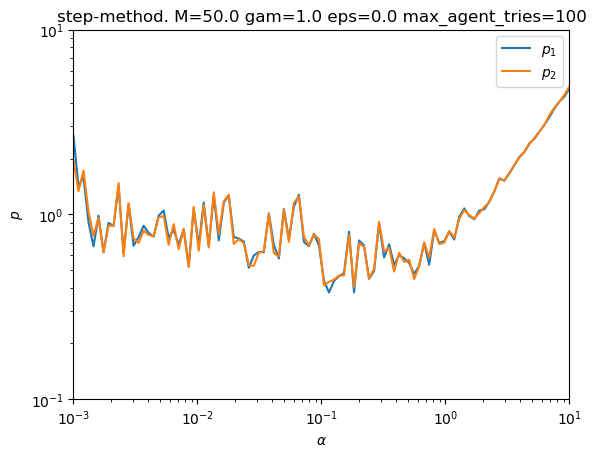

In [18]:
f, ax = plt.subplots()

#ax.plot(price_df[:,0], price_df[:, 0], c='k', ls='--')

for i in [1,2]:
    ax.plot(price_df[:,0], price_df[:, i], label=f'$p_{i}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('$p$')
ax.legend()

ax.set_xlim(1e-3, 1e1)
ax.set_ylim(1e-1, 1e1)

ax.set_title(f'{price_adjust_method}-method. M={M} gam={gamma} eps={epsilon} max_agent_tries={max_agent_tries}')

plt.show()
    

In [12]:
assert False

AssertionError: 

In [ ]:
plt.rcParams['figure.dpi'] = 100

In [ ]:
plot_market(0, log=True)

In [ ]:
plot_market(1, log=True)

In [ ]:
plot_prices(p_df, 0, log=True, includeM=True)

In [ ]:
plot_quantities(Q_df, D_df, 0)

In [ ]:
plot_prices(p_df, 1, log=True, includeM=True)
#plt.grid()

In [ ]:
plot_quantities(Q_df, D_df, 1)

This scheme won't work when the price is zero. 

Because $p' = p_0 (1+\alpha)$ will equal zero when $p_0$ is zero

In [ ]:
QA_0

In [ ]:
Q